# ATT&CK® Data Sources, Components, and Relationships!!
---------------------------------
* **Author**: Jose Luis Rodriguez - [@Cyb3rPandaH](https://twitter.com/Cyb3rPandaH)
* **Organization**: [MITRE ATT&CK](https://attack.mitre.org/)
* **Blog Reference**: 
  - [Defining ATT&CK Data Sources, Part I: Enhancing the Current State](https://medium.com/mitre-attack/defining-attack-data-sources-part-i-4c39e581454f)
  - [Defining ATT&CK Data Sources, Part II: Operationalizing the Methodology](https://medium.com/mitre-attack/defining-attack-data-sources-part-ii-1fc98738ba5b)
  - [Data Sources, Containers, Cloud, and More: What’s New in ATT&CK v9?](https://medium.com/mitre-attack/attack-april-2021-release-39accaf23c81)

## Goal & Scope

The present notebook is intended to provide basic examples on how can you get insights from current **data sources metadata** from **ATT&CK v9**. The examples provided consider (sub)techniques for the **enterprise matrix**.

## Requirements - notebook_functions.py

In this notebook we are using [Python](https://www.python.org) libraries such as [attackcti](https://pypi.org/project/attackcti/), [pandas](https://pandas.pydata.org/), and [yaml](https://pyyaml.org/wiki/PyYAML). The functions we are using in this notebook are defined within the **notebook_funtion.py** [program](https://github.com/Cyb3rPandaH/attack-datasources/tree/main/docs/scripts/notebook_functions.py/) in order to show less lines of code and focus in the exploration of data source objects. You will find more details and comments within the python program. Use the following commands to run the program, import the required libraries, and define functions:

In [1]:
%run docs/scripts/notebook_functions.py

## What is the current state of Data Sources within ATT&CK®?

### Data Components mapped to Enterprise Techniques

Currently, v9 of the ATT&CK framework contains only **Data Components** as metadata for data sources. Let's get all data sources and data components mapped to ATT&CK Enterprise Techniques.

In [2]:
attack = get_attack_dataframe()
attack.head()

[taxii2client.v20] [WARNING ] [2021-12-23 23:34:58,178] TAXII Server Response did not include 'Content-Range' header - results could be incomplete.
[taxii2client.v20] [WARNING ] [2021-12-23 23:34:58,269] TAXII Server Response with different amount of objects! Setting per_request=707


,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component
0,T1564.009,True,Resource Forking,[defense-evasion],[macOS],File,File Creation
1,T1564.009,True,Resource Forking,[defense-evasion],[macOS],Process,Process Creation
2,T1564.009,True,Resource Forking,[defense-evasion],[macOS],File,File Metadata
3,T1564.009,True,Resource Forking,[defense-evasion],[macOS],Command,Command Execution
4,T1562.010,True,Downgrade Attack,[defense-evasion],"[Windows, Linux, macOS]",Command,Command Execution


### Most Relevant Data Components Within Enterprise Sub-Techniques (ALL)

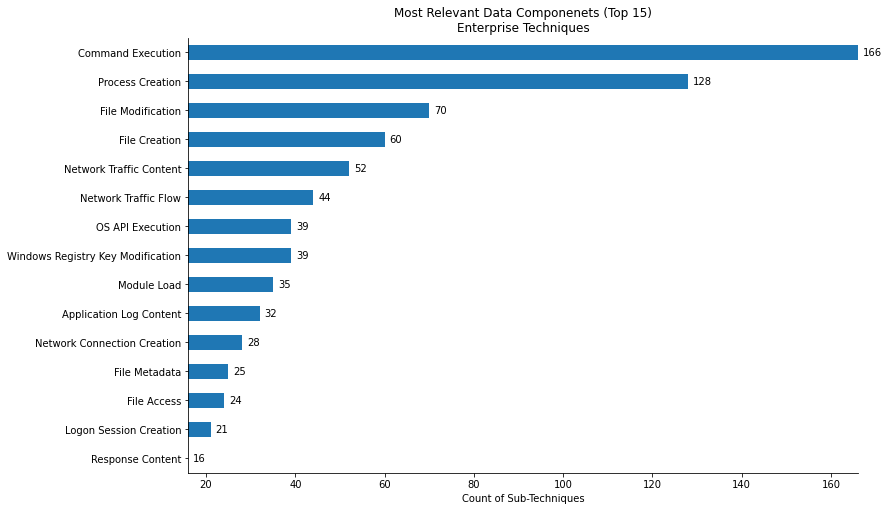

In [3]:
st = attack[attack['x_mitre_is_subtechnique'] == True]
t15_dc = st['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\nEnterprise Techniques'
barh_chart(t15_dc,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

### Most Relevant Data Components Within Enterprise Sub-Techniques (By Platform)

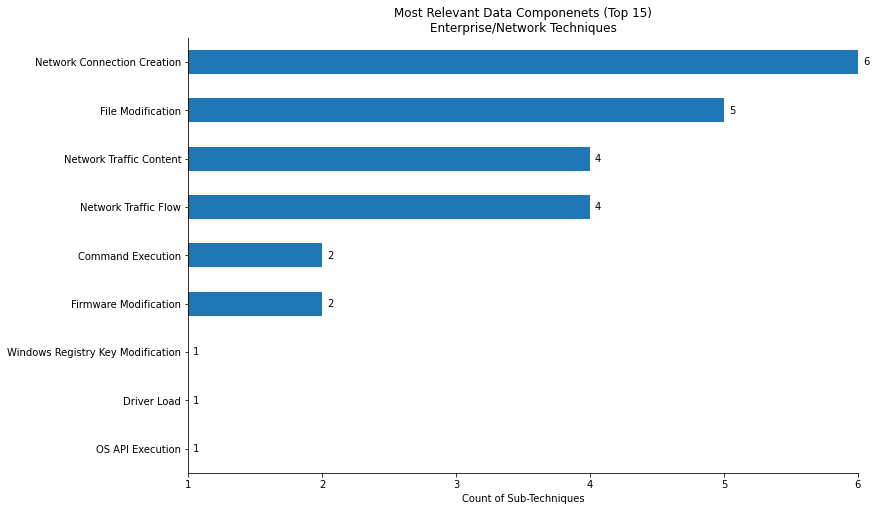

In [4]:
platform = 'Network' # Change this value to update the chart
st_p = attack[attack['x_mitre_is_subtechnique'] == True]
st_p = st_p[(st_p['platform'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains(platform))]
t15_dc_p = st_p['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\n'+'Enterprise/'+ platform+ ' Techniques'
barh_chart(t15_dc_p,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

### Most Relevant Data Components Within Enterprise Sub-Techniques (By Tactic)

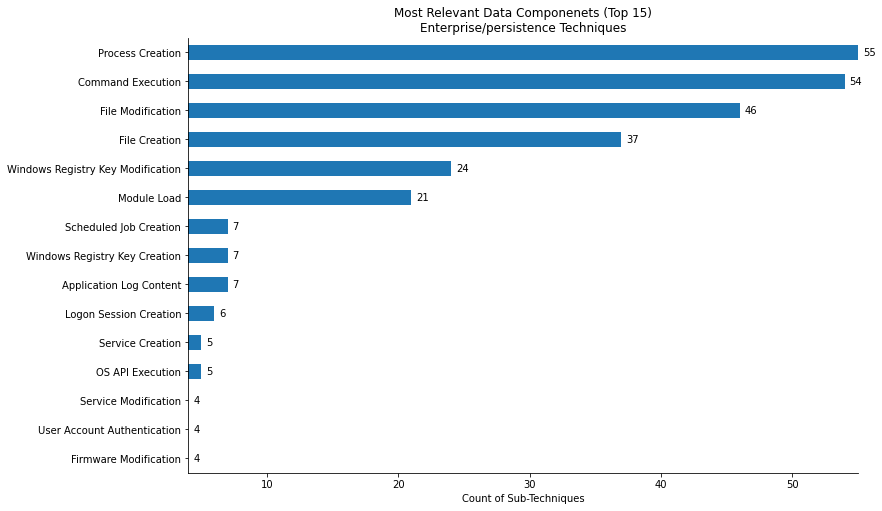

In [5]:
tactic = 'persistence' # Change this value to update the chart
st_t = attack[attack['x_mitre_is_subtechnique'] == True]
st_t = st_t[(st_t['tactic'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains(tactic))]
t15_dc_t = st_t['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\n'+'Enterprise/'+ tactic+ ' Techniques'
barh_chart(t15_dc_t,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

## How do Sub-Techniques, Data Sources, and Data Components relate to each other?

### Use case: T1134 Access Token Manipulation

Even though tables and bar chart are really helpful when summarizing data, other type of visualization such as a **Network** graph could also help us to get a better understanding of how relevant a data component can be when analyzing ATT&CK techniques.

#### Recommended data sources for sub-techniques under Access Token Manipulation for Defense Evasion (Tactic) in Windows (Platform)

In [6]:
mapping = attack[attack['x_mitre_is_subtechnique'] == True]
mapping = mapping[mapping['technique_id'].str.contains('T1134')]
mapping = mapping[mapping['tactic'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains('defense-evasion')]
mapping = mapping[mapping['platform'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains('Windows')]
mapping

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component
727,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
728,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],User Account,User Account Metadata
729,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],Active Directory,Active Directory Object Modification
730,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
731,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,Process Creation
732,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,Process Metadata
733,T1134.003,True,Make and Impersonate Token,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
734,T1134.003,True,Make and Impersonate Token,"[defense-evasion, privilege-escalation]",[Windows],Command,Command Execution
735,T1134.002,True,Create Process with Token,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
736,T1134.002,True,Create Process with Token,"[defense-evasion, privilege-escalation]",[Windows],Command,Command Execution


#### Network Graph

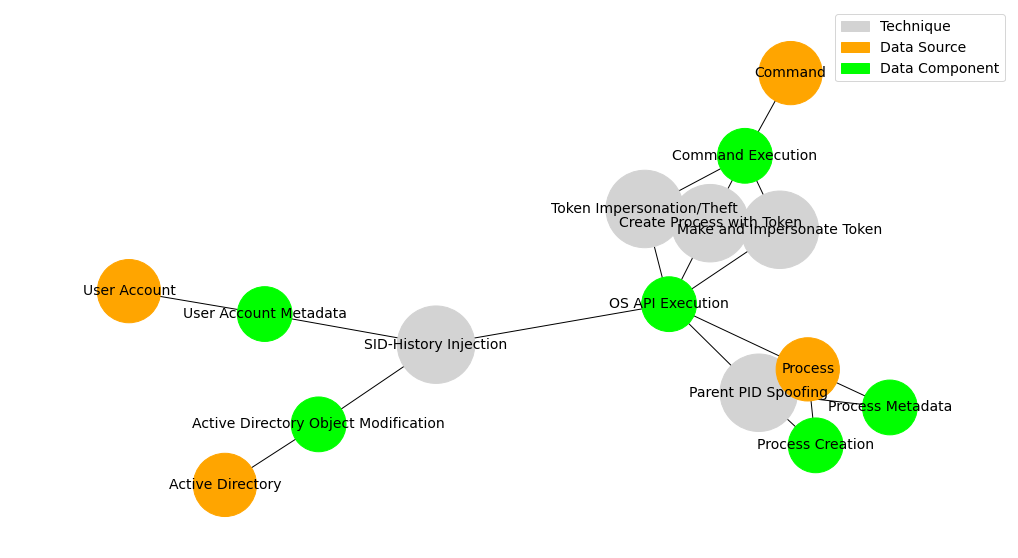

In [7]:
attack_network_graph(mapping)

## How can I import the ATT&CK Techniques to Relationships mapping YAML file? 

In [8]:
techniques_to_relationships = import_yaml('docs/techniques_to_relationships_mapping.yaml')
techniques_to_relationships.head()

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,definition,collection_layers,data_source_platform,contributors,data_component,type,description,source_data_element,relationship,target_data_element,references
0,T1564.009,True,Resource Forking,[defense-evasion],[macOS],file,"A computer resource object, managed by the I/O system, for storing data (such as images, text, videos, computer programs, or any wide variety of other media)",[Host],"[Windows, Linux, macOS, Network]","[ATT&CK, Center for Threat-Informed Defense (CTID)]",file creation,activity,Initial construction of a new file (ex: Sysmon EID 11),process,created,file,[https://docs.microsoft.com/en-us/windows/win32/fileio/file-management]
1,T1564.009,True,Resource Forking,[defense-evasion],[macOS],process,"Instances of computer programs that are being executed by at least one thread. Processes have memory space for process executables, loaded modules (DLLs or shared libraries), and allocated memory regions containing everything from user input to application-specific data structures",[Host],"[Windows, Linux, macOS]","[ATT&CK, Center for Threat-Informed Defense (CTID)]",process creation,activity,Birth of a new running process (ex: Sysmon EID 1 or Windows EID 4688),user,created,process,[https://docs.microsoft.com/en-us/windows/win32/procthread/processes-and-threads]
2,T1564.009,True,Resource Forking,[defense-evasion],[macOS],process,"Instances of computer programs that are being executed by at least one thread. Processes have memory space for process executables, loaded modules (DLLs or shared libraries), and allocated memory regions containing everything from user input to application-specific data structures",[Host],"[Windows, Linux, macOS]","[ATT&CK, Center for Threat-Informed Defense (CTID)]",process creation,activity,Birth of a new running process (ex: Sysmon EID 1 or Windows EID 4688),process,created,process,[https://docs.microsoft.com/en-us/windows/win32/procthread/processes-and-threads]
3,T1564.009,True,Resource Forking,[defense-evasion],[macOS],process,"Instances of computer programs that are being executed by at least one thread. Processes have memory space for process executables, loaded modules (DLLs or shared libraries), and allocated memory regions containing everything from user input to application-specific data structures",[Host],"[Windows, Linux, macOS]","[ATT&CK, Center for Threat-Informed Defense (CTID)]",process creation,activity,Birth of a new running process (ex: Sysmon EID 1 or Windows EID 4688),process,created,thread,[https://docs.microsoft.com/en-us/windows/win32/procthread/processes-and-threads]
4,T1564.009,True,Resource Forking,[defense-evasion],[macOS],file,"A computer resource object, managed by the I/O system, for storing data (such as images, text, videos, computer programs, or any wide variety of other media)",[Host],"[Windows, Linux, macOS, Network]","[ATT&CK, Center for Threat-Informed Defense (CTID)]",file metadata,information,"Contextual data about a file, which may include information such as name, the content (ex: signature, headers, or data/media), user/ower, permissions, etc.",process,created,file stream,[https://docs.microsoft.com/en-us/windows/win32/fileio/file-management]


# We hope you find this notebook helpful!! Thank you :)